# seaborn个性化绘图

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# 定义一个含偏移的正弦图像
np.random.seed(sum(map(ord,"aesthetics")))
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

## 直观展示seaborn和matplotlib的区别

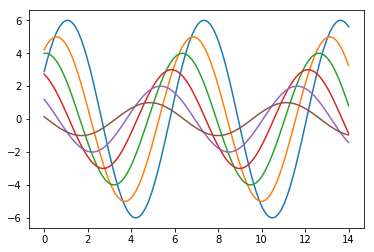

In [11]:
# 使用matplotlib默认设置的图形效果：
sinplot()

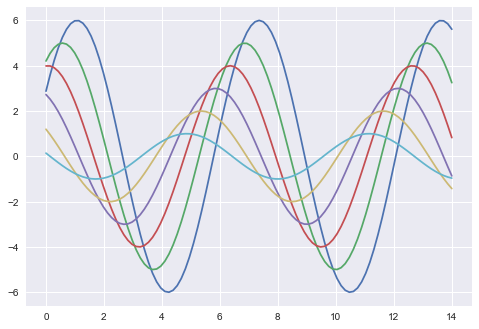

In [12]:
import seaborn as sns
sinplot()

备注：
* seaborn默认的灰色网格让绘图更加柔和

# 样式控制

* set_style()
* axes_style()

In [15]:
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2

In [62]:
# 重置参数
sns.set()

### 灰色网格

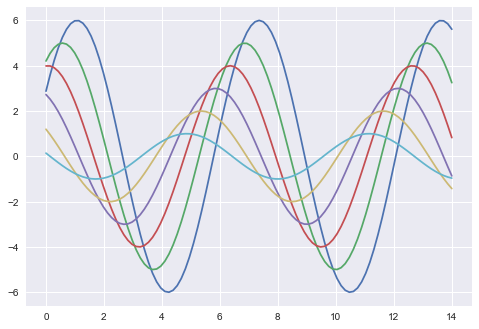

In [24]:
sns.set_style("darkgrid")
sinplot()

### 白色网格

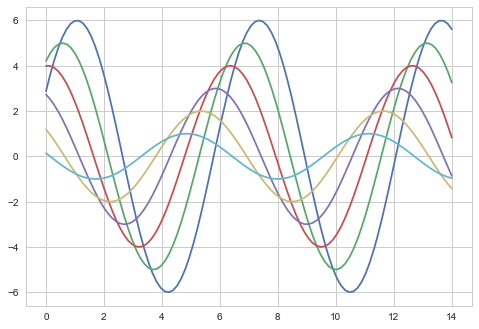

In [16]:
sns.set_style("whitegrid")
sinplot()

### 灰色背景

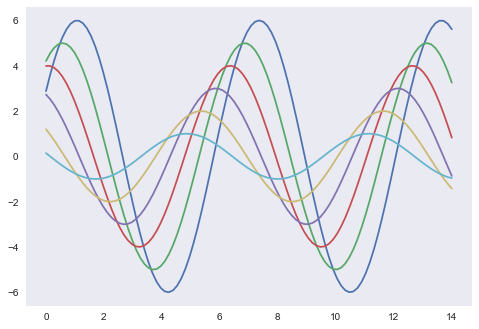

In [17]:
sns.set_style("dark")
sinplot()

### 白色背景

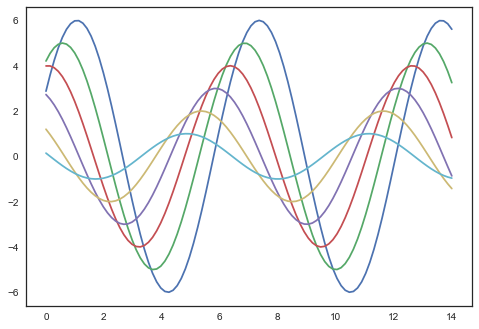

In [20]:
sns.set_style("white")
sinplot()

### 其他

In [ ]:
sns.set_style("ticks")
sinplot()

### 复杂样式

In [46]:
# 字典表
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '0.9',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

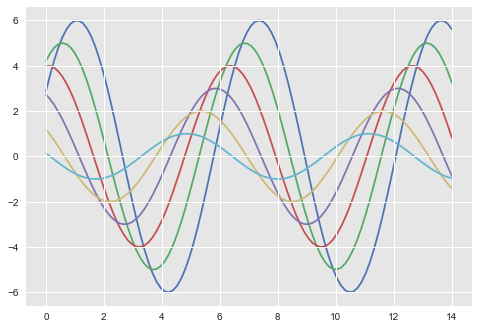

In [49]:
sns.set_style("darkgrid", {"axes.facecolor": '0.9'
                          ,"axes.axisbelow":False
                          })
sinplot()

# 扩展绘图

* set_context()
* plotting_context()

## 控制线条粗细

按相对尺寸的顺序(线条越来越粗)，分别是paper，notebook, talk, and poster。其中notebook的样式是默认的

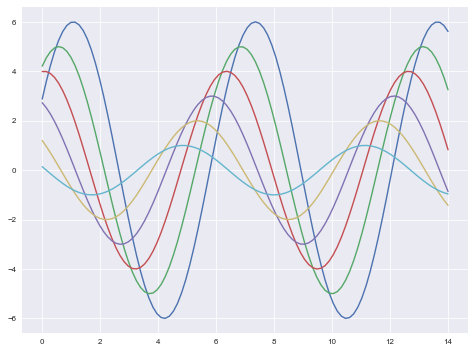

In [56]:
sns.set_context("paper")
plt.figure(figsize=(8,6))
sinplot()

## 控制坐标轴字体大小

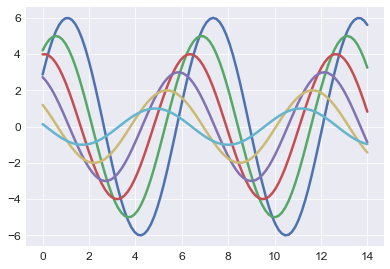

In [60]:
sns.set()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

# 调色板

* 分类：hls、husl、Paired、Set1、Set2、Set3
* 连续：Blues[蓝s，颜色+s] BuGn[蓝绿] cubehelix（同色系渐变）
* 离散：BrBG[棕绿] RdBu[红蓝] coolwarm[冷暖]（双色对称）

## 分类色板

* 分类色板（定性）是在区分没有固定顺序的数据时最好的选择。
* 导入seaborn库后，默认的颜色循环被更改为一组六种颜色

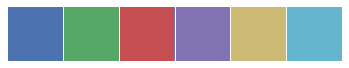

In [70]:
# deep, muted, pastel, bright, dark, 和 colorblind
current_palette = sns.color_palette()
sns.palplot(current_palette)

默认颜色主题共有六种不同的变化分别是：deep, muted, pastel, bright, dark, 和 colorblind。类似下面的方式直接传入即可。

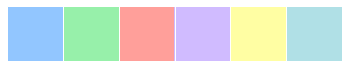

In [69]:
# 直接传入对应的参数即可变化
current_palette = sns.color_palette("pastel") 
sns.palplot(current_palette)

## 圆形颜色系统

* 当有六种以上的分类要区分时，最简单的方法就是在一个圆形的颜色空间中画出均匀间隔的颜色，保证色调的亮度和饱和度不变。

* 最常用的方法是使用hls的颜色空间，这是RGB值的一个简单转换。

### 默认RGB转化

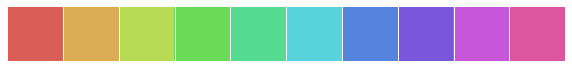

In [73]:
# 最常用的方法是使用hls的颜色空间（RGB值的简单转换）
sns.palplot(sns.color_palette("hls", 10))

**存在的问题1：** 直接转化RGB值，容易出现色彩不均衡的情况，解决方案为调整亮度和饱和度

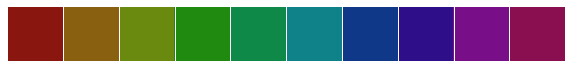

In [81]:
# 手动调整颜色系统，避免出现色彩不均衡的情况。其中l(lightness)表示亮度，s(saturation)表示饱和度
sns.palplot(sns.hls_palette(10, l=.3, s=.8))

**存在的问题2：** 手动调整亮度和饱和度虽然可以一定程度上解决问题，但是还是相对主观，依旧容易出现颜色不均衡的情况

### 改善RGB转化

由于人类视觉系统的工作方式，会导致在RGB度量上强度一致的颜色在视觉中并不平衡。即便通过手动调整过的颜色系统也会出现色彩不均衡的情况。比如，我们黄色和绿色是相对较亮的颜色，而蓝色则相对较暗。所以如何选择均匀间隔的色彩，同时保持亮度和饱和度更加一致是面临的主要问题？

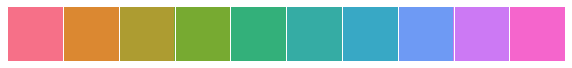

In [82]:
# husl系统可以解决色彩的均衡问题
sns.palplot(sns.color_palette("husl", 10))

**存在的问题3：** husl系统虽然解决了颜色均衡的问题，但是任然存在潜在的问题，比如色盲无法区分红色和绿色。

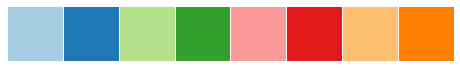

In [89]:
# 适合各种适合色盲的颜色。如避免同时使用红绿色来区分元素
sns.palplot(sns.color_palette("Paired",8))

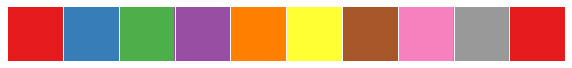

In [125]:
# Set1,Set2,Set3
sns.palplot(sns.color_palette("Set1", 10))

## 连续色板

* 对于连续的数据，最好是使用那些在色调上相对细微变化的调色板，同时在亮度和饱和度上有很大的变化。这种方法将自然地吸引数据中相对重要的部分
* Color Brewer的字典中就有一组很好的调色板。它们是以在调色板中的主导颜色(或颜色)命名的。

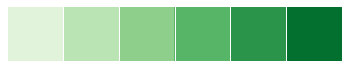

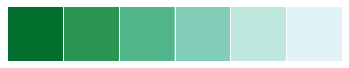

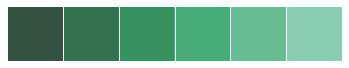

In [117]:
# Blues,Greens
sns.palplot(sns.color_palette("Greens"))

# 翻转展示颜色的渐变，添加后缀 _r
sns.palplot(sns.color_palette("BuGn_r"))

# 尽可能弱化渐变色的边界，添加后缀 _d
sns.palplot(sns.color_palette("BuGn_d"))

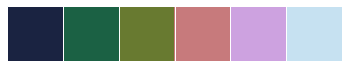

In [126]:
# 同色系渐变
sns.palplot(sns.color_palette("cubehelix"))

## 离散色板

调色板中的第三类被称为“离散”。用于可能无论大的低的值和大的高的值都非常重要的数据。数据中通常有一个定义良好的中点。例如，如果你正在绘制温度变化从基线值，最好使用不同色图显示相对降低和相对增加面积的地区。保证起始值的亮度和饱和度是相同的

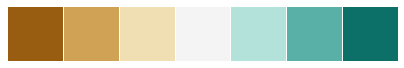

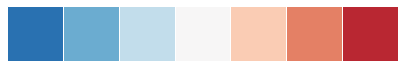

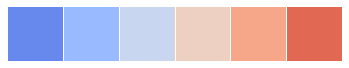

In [128]:
# 棕绿
sns.palplot(sns.color_palette("BrBG", 7))
# 蓝绿
sns.palplot(sns.color_palette("RdBu_r", 7))
# 冷暖，默认六种颜色
sns.palplot(sns.color_palette("coolwarm"))

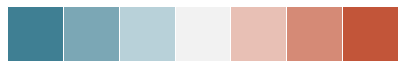

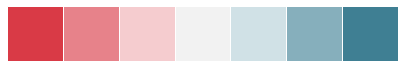

In [124]:
# 使用diverging_palette()为离散的数据创建一个定制的颜色映射
sns.palplot(sns.diverging_palette(220, 20, n=7))

# sep参数控制中间区域渐变的亮度
sns.palplot(sns.diverging_palette(10, 220, sep=50, n=7))